In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import scipy.stats

In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import keras
import pickle

# Collect versions of each library
library_versions = {
    "numpy": np.__version__,
    "pandas": pd.__version__,
    "sklearn": sklearn.__version__,
    "tensorflow": tf.__version__,
    "keras": keras.__version__,
    "pickle": pickle.format_version
}

library_versions

{'numpy': '1.25.2',
 'pandas': '2.0.3',
 'sklearn': '1.2.2',
 'tensorflow': '2.15.0',
 'keras': '2.15.0',
 'pickle': '4.0'}

### *Chuyển đổi tệp thực thi về ảnh xám*

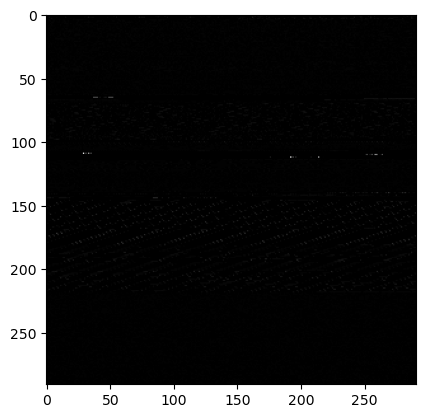

In [ ]:
with open('area.exe', 'rb') as file:
    byte_data = file.read()

hex_data = byte_data.hex()

decimal_data = [int(hex_data[i:i+2], 16) for i in range(0, len(hex_data), 2)]

# Tìm kích thước gần nhất
data_length = len(decimal_data)
N = int(np.ceil(np.sqrt(data_length)))

# Tạo mảng 2D và lấp đầy với các giá trị thập phân
image_array = np.zeros((N, N), dtype=np.uint8)

# Sử dụng các giá trị thập phân để xác định cường độ pixel
for i, value in enumerate(decimal_data):
    row = i // N
    col = i % N
    image_array[row, col] = value
for i in range(N):
    row_sum = np.sum(image_array[i])
    if row_sum != 0:
        image_array[i] = (image_array[i] / row_sum) * 256

plt.plot()
plt.imshow(image_array, cmap='gray')
plt.show()

### *Chuyển đổi tệp thực thi về đồ thị entropy*

In [ ]:
hex_data = byte_data.hex()
decimal_data_en = [int(hex_data[i:i+2],16) for i in range(0 ,len(hex_data),2)]

segments = []
segment_size = 256
segments = [decimal_data[i:i + segment_size] for i in range(0, len(decimal_data), segment_size)]

entropy = []

# Tính toán entropy cho mỗi phân đoạn
entropies = []
for segment in segments:
    if len(segment) < segment_size:
        # Bổ sung 0 để đảm bảo kích thước phân đoạn là 256
        segment += [0] * (segment_size - len(segment))

    # Tính phân bố xác suất
    value, counts = np.unique(segment, return_counts=True)
    probabilities = counts / len(segment)

    # Tính entropy
    entropy = scipy.stats.entropy(probabilities, base=2)
    entropies.append(entropy)
# Tính entropy trung bình
entropies = np.array(entropies)
entropies.reshape(len(entropies), 1)

array([[3.45025172],
       [1.84161846],
       [2.32364187],
       [1.2198092 ],
       [4.45145486],
       [4.3906163 ],
       [4.87805462],
       [5.08454726],
       [5.41075108],
       [4.79597237],
       [5.2040159 ],
       [5.10125704],
       [4.84449932],
       [5.33687117],
       [5.44042036],
       [5.43436695],
       [5.37309988],
       [5.02792398],
       [5.44533592],
       [5.44735461],
       [5.28629716],
       [5.2375295 ],
       [5.03773096],
       [5.03679235],
       [5.48570675],
       [5.94667107],
       [5.36678844],
       [5.44258838],
       [5.74430557],
       [5.68291333],
       [5.5578649 ],
       [5.71263412],
       [5.69008807],
       [5.32284189],
       [5.7252019 ],
       [5.64951555],
       [5.40926354],
       [5.65055066],
       [5.34889938],
       [5.21050611],
       [5.87357713],
       [5.67074233],
       [4.84851011],
       [5.35585567],
       [5.49795627],
       [5.34677999],
       [5.35591654],
       [5.449

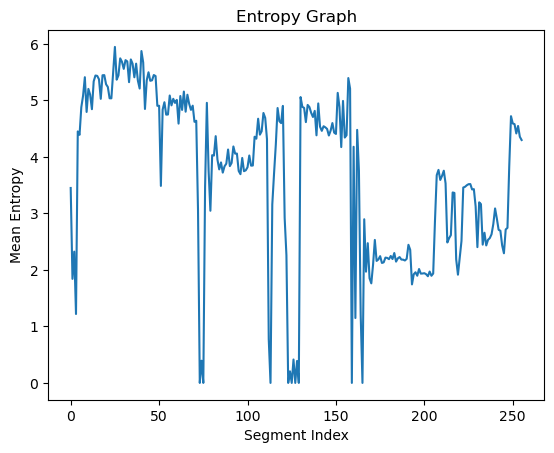

In [ ]:
# Vẽ đồ thị entropy
plt.plot(range(0,min(len(entropies),256)), entropies[:min(len(entropies),256)])
plt.xlabel('Segment Index')
plt.ylabel('Mean Entropy')
plt.title('Entropy Graph')
plt.show()


### *Simhash*

In [ ]:
with open('D:\Contest_TTUD\Makefile', 'rb') as file:
    byte_data = file.read()

hex_data = byte_data.hex()

In [ ]:
from capstone import *

def extract_mnemonic_code(assembly_code):
    md = Cs(CS_ARCH_X86, CS_MODE_64)
    mnemonic_list = []

    # Convert the assembly_code to bytes
    assembly_code_bytes = bytes.fromhex(assembly_code)

    for insn in md.disasm(assembly_code_bytes, 0):
        mnemonic_list.append(insn.mnemonic)

    return mnemonic_list

# Trích xuất mnemonic code
mnemonic_list = extract_mnemonic_code(hex_data)

print("Mnemonic code extracted:")
for mnemonic in mnemonic_list:
    print(mnemonic)

Mnemonic code extracted:
and
and


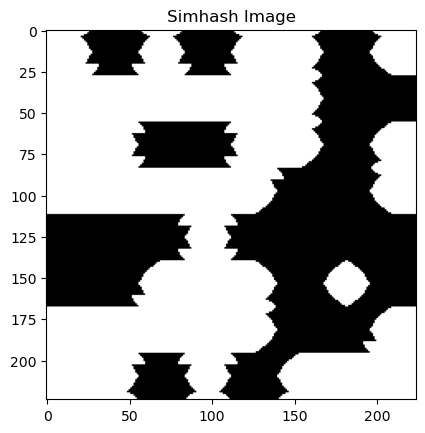

In [ ]:
import numpy as np
import cv2
from simhash import Simhash

# Bước 1: Trích xuất mã mnemonic (giả sử bạn đã có danh sách các mnemonic)
from capstone import *

def extract_mnemonic_code(assembly_code):
    md = Cs(CS_ARCH_X86, CS_MODE_64)
    mnemonic_list = []

    # Convert the assembly_code to bytes
    assembly_code_bytes = bytes.fromhex(assembly_code)

    for insn in md.disasm(assembly_code_bytes, 0):
        mnemonic_list.append(insn.mnemonic)

    return mnemonic_list

# Trích xuất mnemonic code
mnemonics = extract_mnemonic_code(hex_data)

# Bước 2: Tạo chữ ký Simhash
def create_simhash(mnemonics):
    # Tạo một chuỗi từ mnemonic
    mnemonic_str = ' '.join(mnemonics)
    # Tạo Simhash từ chuỗi
    hash_value = Simhash(mnemonic_str).value
    # Chuyển đổi hash_value thành biểu diễn nhị phân
    binary_hash = bin(hash_value)[2:].zfill(64)
    return binary_hash

binary_hash = create_simhash(mnemonics)

# Bước 3: Tạo hình ảnh từ chữ ký Simhash
def binary_hash_to_image(binary_hash):
    binary_list = [int(bit) for bit in binary_hash]
    # Tìm kích thước gần nhất với căn bậc hai của độ dài mảng
    N = int(np.ceil(math.sqrt(len(binary_list))))
    image_array = np.zeros((N, N), dtype=np.uint8)

# Sử dụng các giá trị thập phân để xác định cường độ pixel
    for i, value in enumerate(binary_list):
        row = i // N
        col = i % N
        image_array[row, col] = value
    return image_array

simhash_image = binary_hash_to_image(binary_hash)

# Bước 4: Nội suy song tuyến để phóng to hình ảnh
def bilinear_interpolation(image, new_width, new_height):
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    return resized_image

new_width, new_height = 224, 224  # Kích thước mong muốn
resized_image = bilinear_interpolation(simhash_image, new_width, new_height)

# Lưu hình ảnh
cv2.imwrite('resized_simhash_image.png', resized_image)

# Hiển thị hình ảnh
plt.title('Simhash Image')
plt.imshow(resized_image,cmap='gray')

